# Shell Element Responses (Pyvista)

In [1]:
import openseespy.opensees as ops

import opstool as opst
import opstool.vis.pyvista as opsvis


In [2]:
opst.load_ops_examples("Dam-Brick")

ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)
_ = opst.pre.gen_grav_load(direction="Z", factor=-9.81)

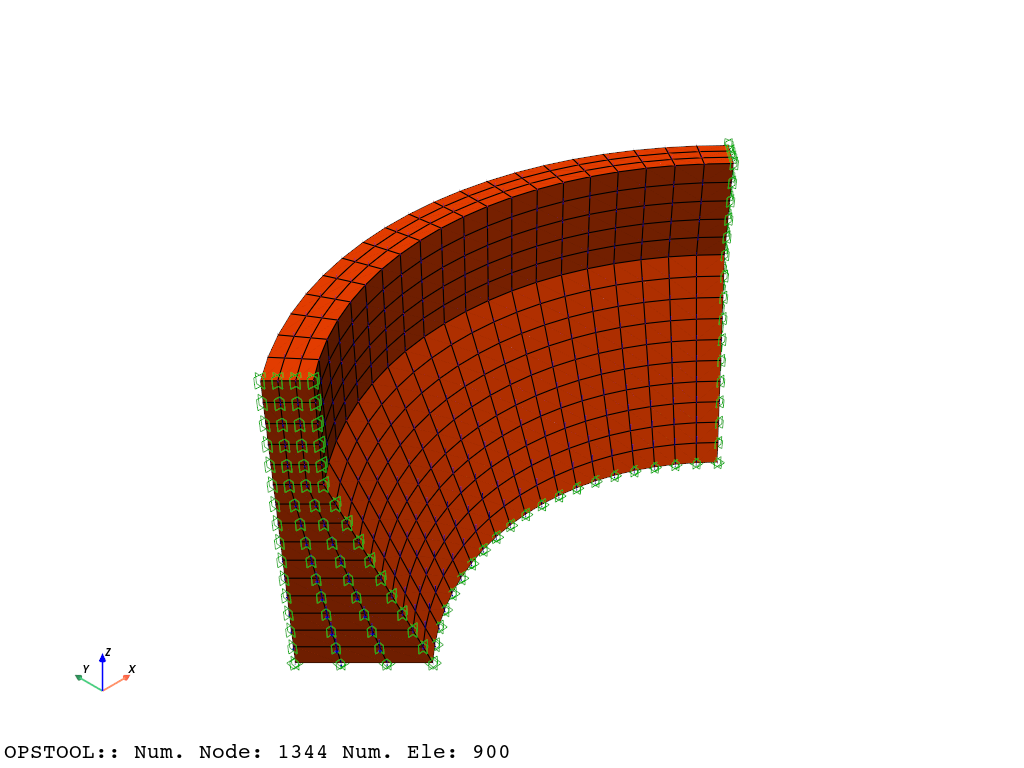

In [3]:
opsvis.set_plot_props(point_size=0, line_width=3, notebook=True)
fig = opsvis.plot_model(show_nodal_loads=True, show_ele_loads=True)
fig.show(jupyter_backend="jupyterlab")
# fig.show()

In [4]:
ops.constraints("Transformation")
ops.numberer("RCM")
ops.system("BandGeneral")
ops.test("NormDispIncr", 1.0e-12, 6, 2)
ops.algorithm("Linear")
ops.integrator("LoadControl", 0.1)
ops.analysis("Static")

In [ ]:
ODB = opst.post.CreateODB(
    odb_tag=1,
    compute_mechanical_measures=True,  # compute stress measures, strain measures, etc.
    project_gauss_to_nodes="copy",  # project gauss point responses to nodes, optional ["copy", "average", "extrapolate"]
)
for _ in range(10):
    ops.analyze(1)
    ODB.fetch_response_step()
ODB.save_response()

OPSTOOL ::  All responses data with _odb_tag = 1 saved in .opstool.output/RespStepData-1.nc!

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

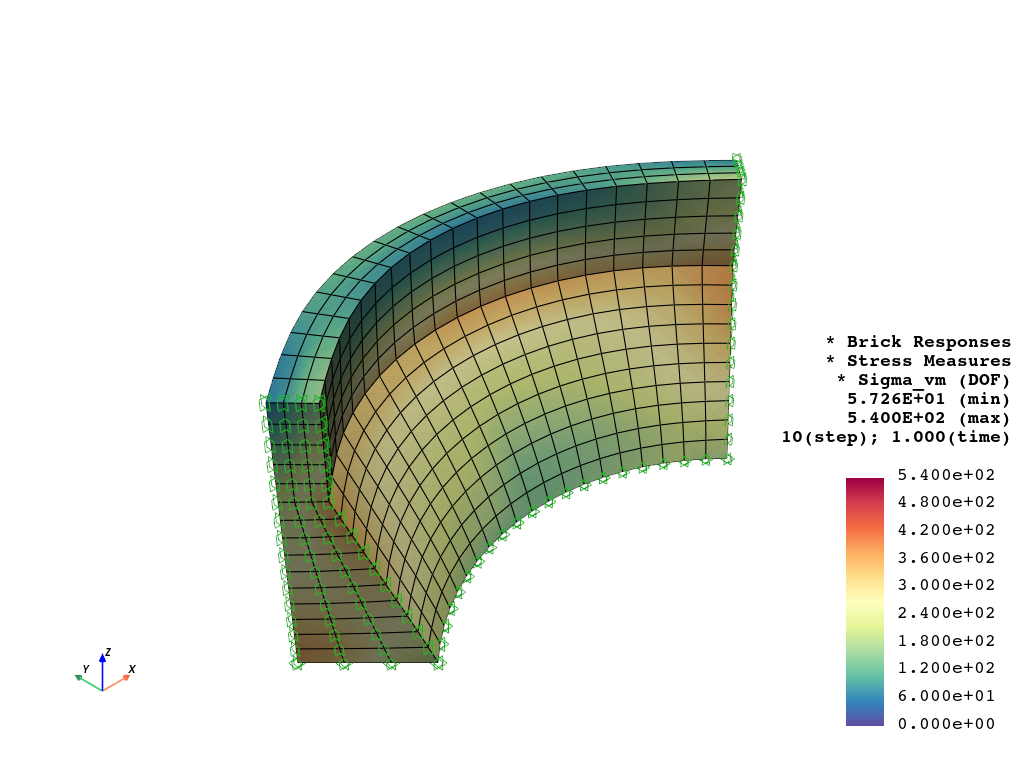

In [ ]:
opsvis.set_plot_props(cmap="Spectral_r", point_size=0.0, notebook=True)

fig = opsvis.plot_unstruct_responses(
    odb_tag=1,
    slides=False,
    step="absMax",
    ele_type="Brick",
    resp_type="StressesAtNodes",  # or "stressesAtGauss", "strainsAtNodes", project_gauss_to_nodes needs to be set prior
    resp_dof="sigma_vm",
    show_defo=True,
    defo_scale=1.5,
    show_model=True,
)
fig.show(jupyter_backend="jupyterlab")
# fig.show()

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

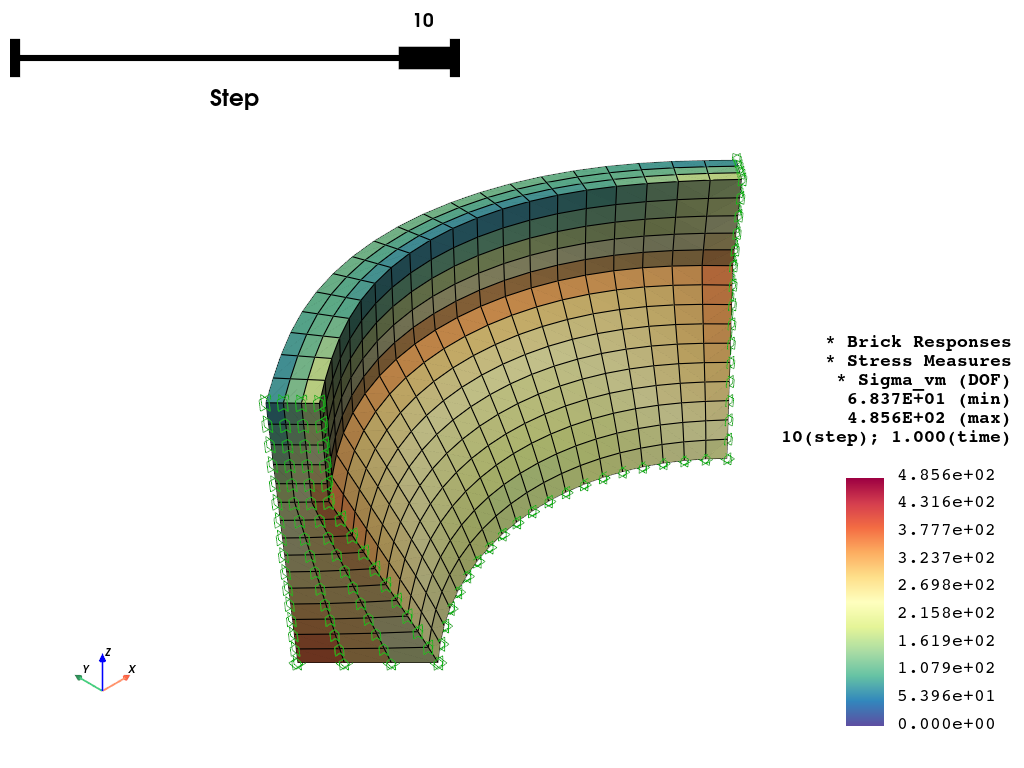

In [7]:
fig = opsvis.plot_unstruct_responses(
    odb_tag=1,
    slides=True,
    ele_type="Brick",
    resp_type="stresses",  # at Gauss points, it will be averaged over the element
    resp_dof="sigma_vm",
    show_model=False,
    show_defo=True,
    defo_scale=1.5,
)
fig.show(jupyter_backend="jupyterlab")
# fig.show()

In [8]:
fig = opsvis.plot_unstruct_responses_animation(
    odb_tag=1,
    ele_type="Brick",
    resp_type="stressesAtNodes",  # at nodes
    resp_dof="sigma_vm",
    savefig="images/BrickRespAnimation.gif",
    framerate=2,
    show_model=True,
    show_defo=True,
    defo_scale=1.5,
)
fig.close()

OPSTOOL ::  Loading response data from .opstool.output/RespStepData-1.nc ...

Animation has been saved as images/BrickRespAnimation.gif!


![BrickRespAnimation](images/BrickRespAnimation.gif)